In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_excel('data.xlsx',converters={'FIFO':str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unikey         481 non-null    int64         
 1   Creation_Date  481 non-null    datetime64[ns]
 2   Product        481 non-null    object        
 3   Emp_Process    481 non-null    object        
 4   SO             481 non-null    int64         
 5   FailItem       481 non-null    object        
 6   Item           388 non-null    object        
 7   ReasonC        481 non-null    object        
 8   Location       481 non-null    object        
 9   smd_job        397 non-null    float64       
 10  ESN            479 non-null    object        
 11  FIFO           464 non-null    object        
 12  Vendor         426 non-null    object        
 13  Vendor D/C     407 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 52.7+

In [162]:
df.drop('Unikey',axis=1, inplace=True)

In [163]:
df['Product2']= df['Product'].apply(lambda x:x.split('-')[1])
df

,Creation_Date,Product,Emp_Process,SO,FailItem,Item,ReasonC,Location,smd_job,ESN,FIFO,Vendor,Vendor D/C,Product2
0,2021-06-29 08:16:49.000,012-04112-20,SMT,15538535,F119.組裝不良,745-0C181-G0,A50.其他,L904,15538535.0,3376593130,121420002758,NaN,1T100621T4635,04112
1,2021-09-02 10:46:46.000,012-04110-23,SMT,15602000,F44.按鍵測試不良,745-0C181-G0,A50.其他,L904,15602000.0,3387754600,1040220005823,線藝電子,1T041321T2766,04110
2,2022-01-15 11:53:08.237,011-05538-M4,Assy,15758144,F44.按鍵測試不良,745-0C181-G0,A4.缺件,L900,15764599.0,3404095788,1063020012635,線藝電子,1T041321T2766,05538
3,2022-02-16 16:02:50.067,011-05275-M7,Assy,15804792,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L904,15803909.0,3408361511,1063020013068,線藝電子,1T100621T4635,05275
4,2022-02-19 13:05:55.627,011-05275-M6,Assy,15800336,F44.按鍵測試不良,745-0C181-G0,A5.反向(件),L902,15800337.0,3408252236,1063020013068,線藝電子,NaN,05275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-01-13 19:10:27.923,010-02539-03,FT,15764621,F44.按鍵測試不良,745-0C181-G0,A10.零件壞(不良),L903,15764622.0,3403594663,1050720010608,線藝電子,1T041321T2766,02539
477,2022-01-06 11:52:21.920,010-02539-03,FT,15764621,F44.按鍵測試不良,745-0C181-G0,A10.零件壞(不良),L903,15764622.0,3403594515,1050720010608,線藝電子,1T041321T2766,02539
478,2022-01-05 16:58:58.927,010-02539-01,FT,15764619,F5737.按鍵_卡Key,745-0C181-G0,A10.零件壞(不良),L903,15764620.0,3403593250,1050720010809,線藝電子,1T041321T2766,02539
479,2021-03-12 11:02:31.000,010-02539-01,Assy,15394768,F44.按鍵測試不良,745-0C181-G0,A50.其他,L902,577525.0,3364599898,NaN,NaN,1T033121T2237,02539


In [164]:
def product(x):
    if x == '04112' or x=='02541' or x=='05276':
        return 'Fenix 7X'
    elif x == '04111' or x=='02540' or x=='05275':
        return 'Fenix 7'
    elif x == '04110' or x=='02539' or x=='05274':
        return 'Fenix 7S'

In [165]:
df['P3'] = df['Product2'].apply(product)

In [166]:
df['P3'].value_counts()

Fenix 7     358
Fenix 7X     97
Fenix 7S     23
Name: P3, dtype: int64

In [167]:
dfa = df[df['Emp_Process']!='AOI']
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 480
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Creation_Date  384 non-null    datetime64[ns]
 1   Product        384 non-null    object        
 2   Emp_Process    384 non-null    object        
 3   SO             384 non-null    int64         
 4   FailItem       384 non-null    object        
 5   Item           291 non-null    object        
 6   ReasonC        384 non-null    object        
 7   Location       384 non-null    object        
 8   smd_job        377 non-null    float64       
 9   ESN            382 non-null    object        
 10  FIFO           368 non-null    object        
 11  Vendor         345 non-null    object        
 12  Vendor D/C     326 non-null    object        
 13  Product2       384 non-null    object        
 14  P3             381 non-null    object        
dtypes: datetime64[ns](1), f

<AxesSubplot:xlabel='Location', ylabel='count'>

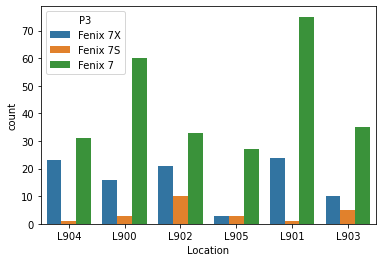

In [168]:
sns.countplot(x='Location', hue='P3', data=dfa)

<AxesSubplot:xlabel='Vendor', ylabel='count'>

C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 34269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wangcooper\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning

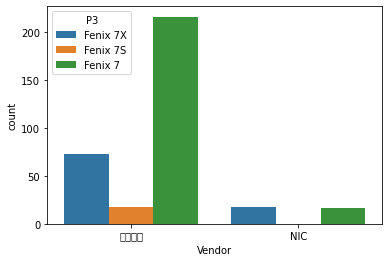

In [169]:
sns.countplot(x='Vendor', hue='P3', data=dfa)

<AxesSubplot:xlabel='Vendor D/C', ylabel='count'>

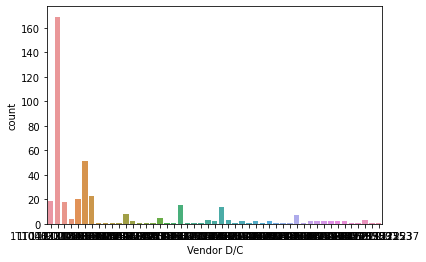

In [170]:
sns.countplot(x='Vendor D/C', data=df)

1T041321T2766    136
1T113021T2076     28
1T100621T4635     17
9D2119            16
1T030921T2266     15
Name: Vendor D/C, dtype: int64

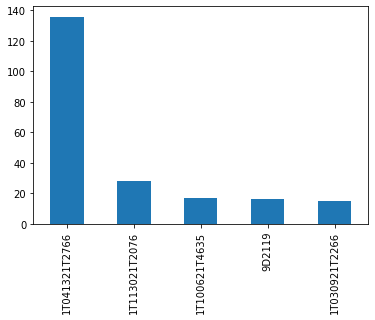

In [171]:
dfa['Vendor D/C'].value_counts().head(5).plot(kind='bar')
dfa['Vendor D/C'].value_counts().head(5)

<AxesSubplot:>

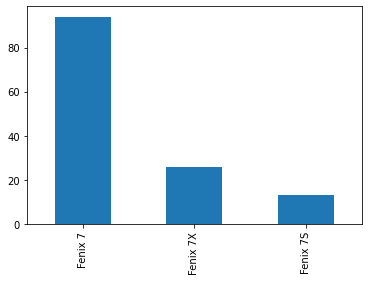

In [185]:
dfa[dfa['Vendor D/C']=='1T041321T2766']['P3'].value_counts().plot(kind='bar')

In [175]:
dfa[dfa['Vendor D/C']=='1T041321T2766']['FIFO'].value_counts().head(10)

1063020013047    6
1063020013028    4
1111520003342    4
1063020012906    4
1111520003343    4
1063020013044    4
1063020012956    4
1063020012977    4
1063020012966    3
1063020012639    3
Name: FIFO, dtype: int64

In [173]:
dfa[dfa['FIFO']=='1063020013047']

,Creation_Date,Product,Emp_Process,SO,FailItem,Item,ReasonC,Location,smd_job,ESN,FIFO,Vendor,Vendor D/C,Product2,P3
247,2022-01-26 08:11:27.387,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L903,15775492.0,3405945186,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7
248,2022-01-24 22:28:00.840,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L900,15775492.0,3405945304,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7
249,2022-01-26 08:23:42.140,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L903,15775492.0,3405945255,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7
250,2022-01-26 08:43:16.330,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L904,15775492.0,3405945089,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7
251,2022-01-26 10:28:39.250,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L904,15775492.0,3405945598,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7
252,2022-01-26 11:29:47.450,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A116.撞件,L903,15775492.0,3405945368,1063020013047,線藝電子,1T111821T3875,02540,Fenix 7
253,2022-01-24 18:03:55.367,010-02540-31,Assy,15775491,F44.按鍵測試不良,745-0C181-G0,A10.零件壞(不良),L901,15775492.0,3405944961,1063020013047,線藝電子,1T041321T2766,02540,Fenix 7


In [182]:
df.SO.sort_values(ascending=True).value_counts().head(10)

15768544    12
15791525    10
15768498     9
15765411     8
15791539     8
15768506     8
15791538     8
15775491     7
15416629     7
15758121     7
Name: SO, dtype: int64